## Predicting Heart Disease


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


### Data loading

We load a pre-existing dataset for heart disease prediction 

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')

df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

In [5]:
X = df.drop(['Heart Disease'], axis=1)
y = df['Heart Disease']

X.shape, y.shape

((270, 13), (270,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)
prediction_lr = logistic.predict(X_test)
print(classification_report(y_test,prediction_lr))


              precision    recall  f1-score   support

     Absence       0.91      0.94      0.93        33
    Presence       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



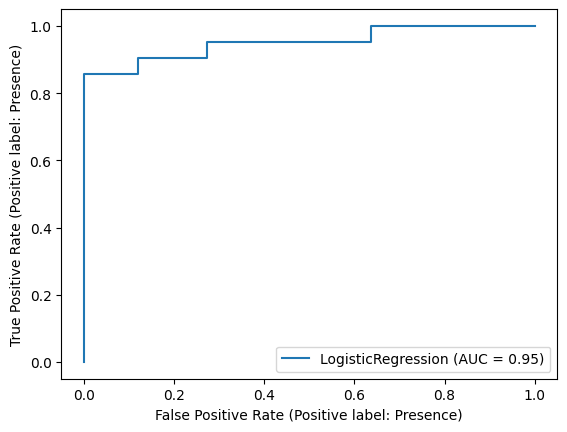

In [8]:

RocCurveDisplay.from_estimator(logistic, X_test, y_test)
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
prediction_dt = tree.predict(X_test)
print(classification_report(y_test, prediction_dt))


              precision    recall  f1-score   support

     Absence       0.83      0.73      0.77        33
    Presence       0.64      0.76      0.70        21

    accuracy                           0.74        54
   macro avg       0.73      0.74      0.73        54
weighted avg       0.75      0.74      0.74        54



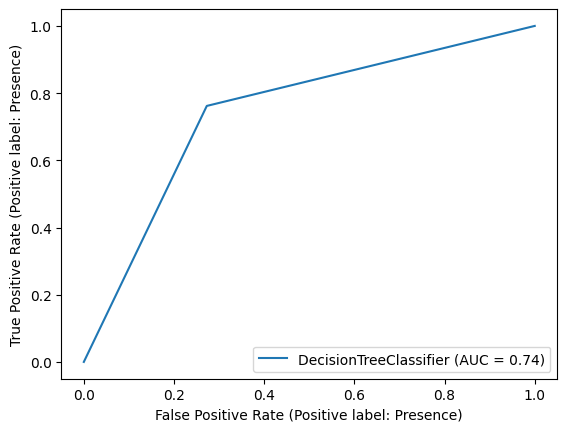

In [10]:
RocCurveDisplay.from_estimator(tree, X_test, y_test)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
prediction_rf = forest.predict(X_test)
print(classification_report(y_test, prediction_rf))


              precision    recall  f1-score   support

     Absence       0.88      0.91      0.90        33
    Presence       0.85      0.81      0.83        21

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.86        54
weighted avg       0.87      0.87      0.87        54



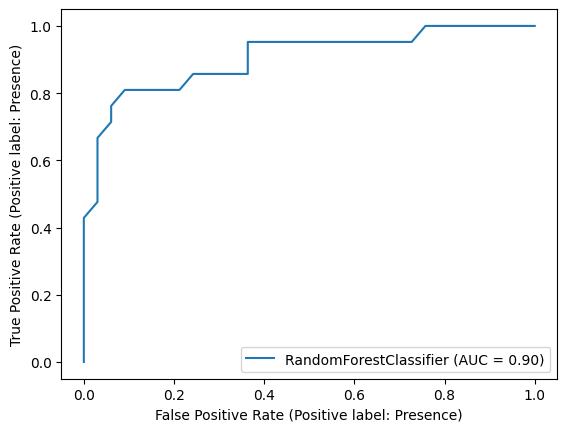

In [12]:
RocCurveDisplay.from_estimator(forest, X_test, y_test)
plt.show()

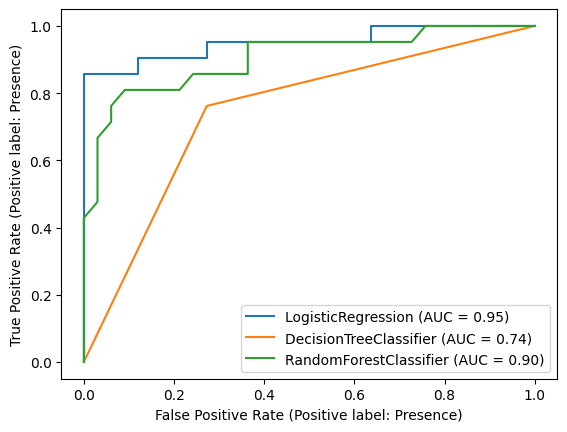

In [13]:
fig, ax=plt.subplots()

RocCurveDisplay.from_estimator(logistic, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(tree, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(forest, X_test, y_test, ax=ax)

plt.show()
